In [4]:
#API Calls - Los Angeles

import requests
import pandas as pd

# %pip install openpyxl

# Load the FIPS codes into a set for efficiency
fips_codes_df = pd.read_excel('./data_files/Los_Angeles_Tract_ID.xlsx', header=None, engine='openpyxl')
fips_codes = set(fips_codes_df[0])  # Assuming the FIPS codes are in the first column

# DataFrame to store all results
los_angeles_data = pd.DataFrame()
print(fips_codes)
# Initialize counters for tracking API calls
success_count = 0
fail_count = 0


# Loop through the FIPS codes, limited by 100 rows. max 178
for i, fips_code in enumerate(fips_codes):
    if i >= 400:
        break  # Exit the loop after reaching max_calls

    # Construct the API URL for Houston data
    url = f"https://ejscreen.epa.gov/mapper/ejscreenRESTbroker1.aspx?namestr={fips_code}&geometry=&distance=&unit=9035&areatype=tract&areaid={fips_code}&f=json"
    response = requests.get(url)
    
    data = response.json()
    if 'data' in data:
        df = pd.json_normalize(data['data'])
        los_angeles_data = pd.concat([los_angeles_data, df], ignore_index=True)
        success_count += 1
    else:
        fail_count += 1

# Display the counts and the first few rows of the combined data
print(f"Success: {success_count}, Failures: {fail_count}")

{6037504001, 6037504002, 6037405701, 6037405702, 6037209102, 6037209103, 6037209104, 6037119001, 6037119002, 6037430301, 6037430302, 6037127210, 6037553200, 6037143602, 6037143603, 6037127220, 6037143604, 6037463101, 6037463102, 6037700700, 6037602402, 6037602403, 6037602404, 6037504101, 6037291110, 6037504102, 6037405800, 6037209200, 6037291120, 6037930101, 6037291130, 6037430400, 6037127300, 6037242000, 6037143700, 6037553300, 6037463200, 6037700801, 6037700802, 6037602504, 6037602505, 6037291210, 6037602506, 6037405900, 6037602507, 6037602508, 6037602509, 6037209300, 6037291220, 6037201110, 6037930200, 6037201120, 6037119201, 6037119202, 6037430501, 6037430502, 6037127400, 6037242100, 6037143800, 6037553400, 6037463300, 6037291300, 6037700901, 6037700902, 6037602600, 6037201200, 6037406000, 6037209401, 6037209402, 6037209403, 6037111100, 6037930301, 6037430600, 6037119310, 6037234000, 6037119320, 6037242200, 6037143901, 6037143902, 6037553502, 6037127520, 6037553503, 6037553504, 603

In [4]:
#Exploring Data

los_angeles_data.describe()
los_angeles_data.shape


(10, 317)

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 5.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 2.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1376: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  self.diag_axes = np.array(diag_axes, np.object)


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

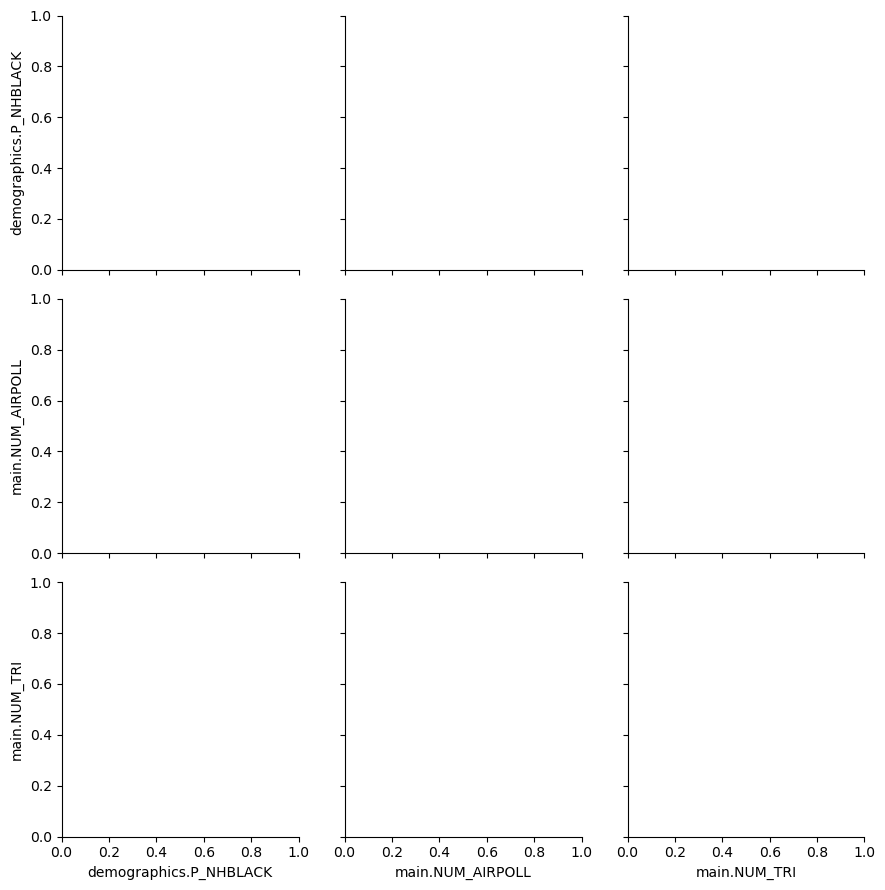

In [7]:
#Visualizing Data

#If you don't already have seaborn
# %pip install --upgrade seaborn
# %pip install --upgrade numpy

import seaborn as sns 
import pandas as pd

#Setting the theme
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#Convert to numeric
los_angeles_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]] = los_angeles_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]].apply(pd.to_numeric)


sns.pairplot(los_angeles_data, vars =["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"],height=3)
# sns.scatterplot(x="demographics.P_NHBLACK", y="extras.RAW_CI_FLOOD", data= los_angeles_data)


#Outliers problematic

In [12]:
#Pandas DF to SQL DB

#inspired by https://stackoverflow.com/questions/30631325/writing-to-mysql-database-with-pandas-using-sqlalchemy-to-sql
# %pip install sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data_files/los_angeles_epa.db')

los_angeles_data.to_sql('los_angeles_epa', engine, index=False, if_exists='replace')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


10

In [15]:
#Check SQL Database

from sqlalchemy import create_engine, text

# Create an engine that connects to the SQLite database file in your data_files directory
engine = create_engine('sqlite:///data_files/los_angeles_epa.db')

# Connect to the database
with engine.connect() as connection:
    # Execute a simple SQL query to count the rows in the los_angeles_epa table
    row_count = connection.execute(text("SELECT COUNT(*) FROM los_angeles_epa")).fetchone()[0]

print(f"The number of rows in the 'los_angeles_epa' table is: {row_count}")

The number of rows in the 'chicago_epa' table is: 10
